# **Tesla Stock Price Prediction using Facebook Prophet **

Importing relevant libraries

In [20]:
import pandas as pd
import numpy as np
!pip install prophet
from prophet import Prophet
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = 'colab'

### Importing the dataset from the Yahoo Finance
To import the data from yahoo finance, follow this pathway- Google - Yahoo finance- search Tesla - Historical data - Select relevant date - apply - download


In [3]:
df = pd.read_csv('TSLA.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-25,272.216675,274.146667,267.399994,268.433319,268.433319,64073400
1,2022-07-26,266.513336,267.309998,256.263336,258.859985,258.859985,66820800
2,2022-07-27,263.809998,275.926666,261.790009,274.820007,274.820007,88110000
3,2022-07-28,280.066681,283.299988,272.799988,280.899994,280.899994,84723000
4,2022-07-29,280.700012,298.320007,279.100006,297.149994,297.149994,95313000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,213.550661,218.204643,208.498095,213.427222,213.427222,1.246670e+08
std,53.706303,54.247868,53.050260,53.571901,53.571901,4.927728e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.902500,182.459999,172.507496,178.762501,178.762501,8.593658e+07
50%,198.919998,203.474998,193.599998,197.684998,197.684998,1.200864e+08
75%,266.240830,271.399994,260.197510,264.769989,264.769989,1.598709e+08
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08


# Exploratory Data Analysis using Plotly Express

In [6]:
px.area(df, x = 'Date', y = 'Close')

In [7]:
px.line(df, x = 'Date', y = 'Close')

In [8]:
px.area(df, x = 'Date', y = 'Volume')

In [9]:
px.bar(df, y = 'Volume')

In [10]:
px.box(df, y ='Close')

Creating a new dataframe with only date and Close column and then renaming them to ds and y.

In [11]:
ndf = pd.DataFrame(df, columns = ['Date', 'Close'])
ndf.head(5)

,Date,Close
0,2022-07-25,268.433319
1,2022-07-26,258.859985
2,2022-07-27,274.820007
3,2022-07-28,280.899994
4,2022-07-29,297.149994


In [12]:
prophet_df = ndf.rename(columns = {'Date':'ds', 'Close':'y'})
prophet_df.head(5)

,ds,y
0,2022-07-25,268.433319
1,2022-07-26,258.859985
2,2022-07-27,274.820007
3,2022-07-28,280.899994
4,2022-07-29,297.149994


Creating the Prophet the model and training the dataset

In [21]:
prop = Prophet()
prop.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz34ou69y/jcvtxu4e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz34ou69y/yry23_gu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78273', 'data', 'file=/tmp/tmpz34ou69y/jcvtxu4e.json', 'init=/tmp/tmpz34ou69y/yry23_gu.json', 'output', 'file=/tmp/tmpz34ou69y/prophet_model7zf6yleh/prophet_model-20230726091351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


creating future dataframe and then predicting the data

In [22]:
future = prop.make_future_dataframe(periods = 30)
forecast = prop.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-25,304.834558,285.873959,342.540431,304.834558,304.834558,8.152214,8.152214,8.152214,8.152214,8.152214,8.152214,0.0,0.0,0.0,312.986772
1,2022-07-26,303.959258,280.782816,338.701350,303.959258,303.959258,6.544578,6.544578,6.544578,6.544578,6.544578,6.544578,0.0,0.0,0.0,310.503836
2,2022-07-27,303.083959,281.891912,338.371310,303.083959,303.083959,7.789508,7.789508,7.789508,7.789508,7.789508,7.789508,0.0,0.0,0.0,310.873467
3,2022-07-28,302.208660,282.628025,337.642693,302.208660,302.208660,7.200193,7.200193,7.200193,7.200193,7.200193,7.200193,0.0,0.0,0.0,309.408853
4,2022-07-29,301.333360,280.691970,337.221318,301.333360,301.333360,7.586325,7.586325,7.586325,7.586325,7.586325,7.586325,0.0,0.0,0.0,308.919686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2023-08-20,298.974411,251.097176,311.031057,296.394815,301.854361,-18.636417,-18.636417,-18.636417,-18.636417,-18.636417,-18.636417,0.0,0.0,0.0,280.337994
278,2023-08-21,300.051752,279.576761,337.161498,297.316782,303.115466,8.152214,8.152214,8.152214,8.152214,8.152214,8.152214,0.0,0.0,0.0,308.203966
279,2023-08-22,301.129092,278.514443,335.465561,298.255228,304.425534,6.544578,6.544578,6.544578,6.544578,6.544578,6.544578,0.0,0.0,0.0,307.673670
280,2023-08-23,302.206433,283.423459,338.330849,299.153280,305.685295,7.789508,7.789508,7.789508,7.789508,7.789508,7.789508,0.0,0.0,0.0,309.995941


In [26]:
px.line(forecast, x = 'ds', y = 'yhat')

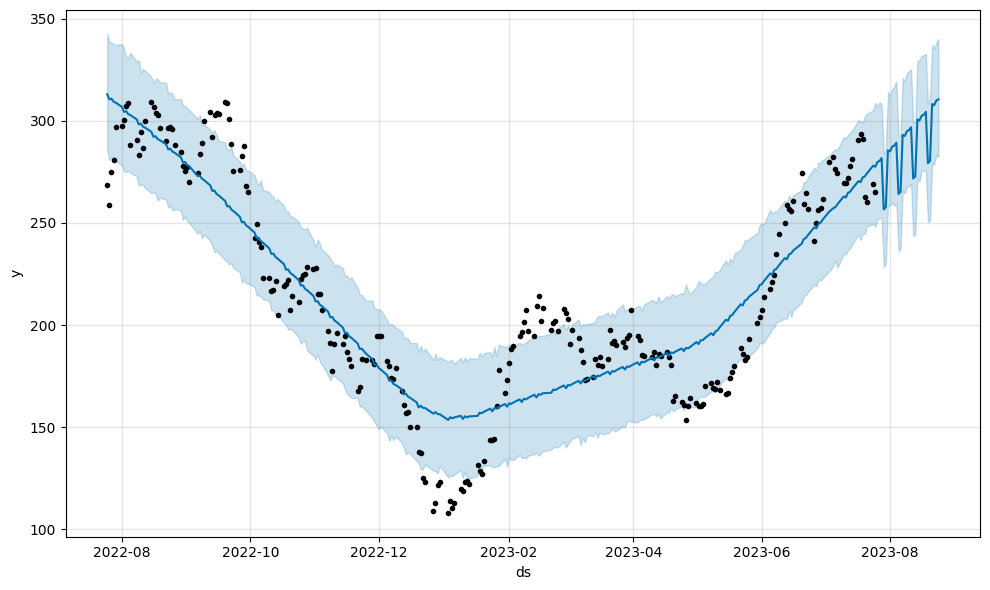

In [27]:
figure = prop.plot(forecast, xlabel = 'ds', ylabel = 'y')

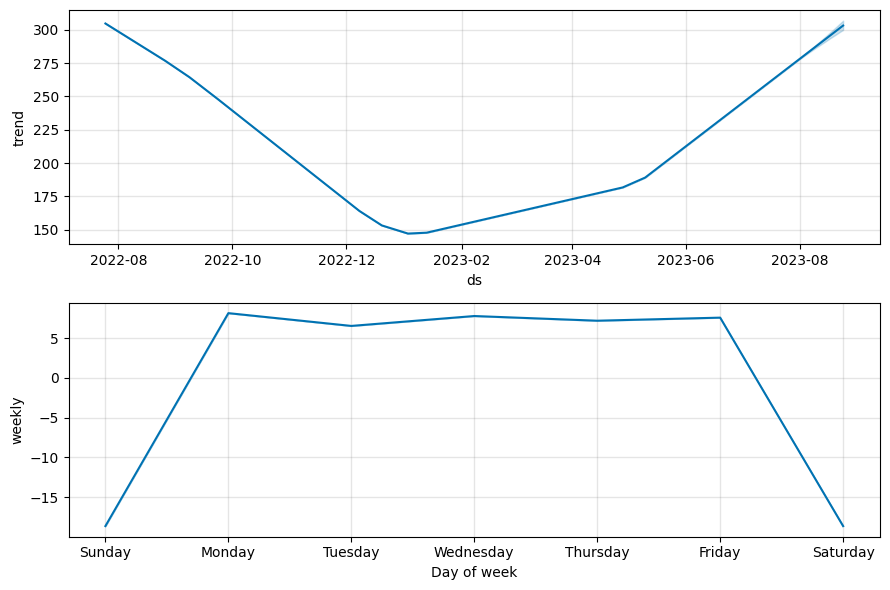

In [28]:
fig2 = prop.plot_components(forecast)

Downloading the forecasted file as csv

In [30]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>